# French Electric Mix in 2019

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline 

* https://opendata.reseaux-energies.fr/pages/accueil/
* https://bilan-electrique-2019.rte-france.com/
* https://transparency.entsoe.eu/

# Module construction production & demande 

> Données entrée : 
* Courbe de demande 
* Courbe de production 
* Capacité installée de chaque filière
* Demande nette fournit imports/exports





# Reconstruire la courbe 

In [9]:
hours = [i for i in range(24)]

"Nucléaire, renouvelable, thermique"
c0 = 40
c1 = 20
c2 = 10

In [13]:
demande = [50,45,40,40,40,40,40,40,40,45,50,55,60,60,60,70,70,70,65,60,57,53,50,50]

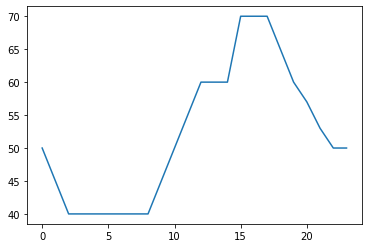

In [15]:
plt.plot(hours,demande)

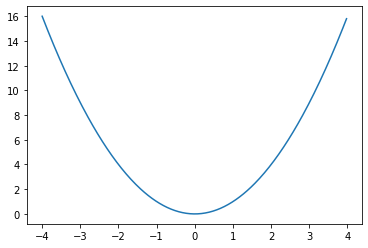

In [16]:
section = np.arange(-1, 1, 1/20.)
def f(t):
    return t * t

t = np.arange(-4,4,1/40.)
plt.plot(t,f(t))


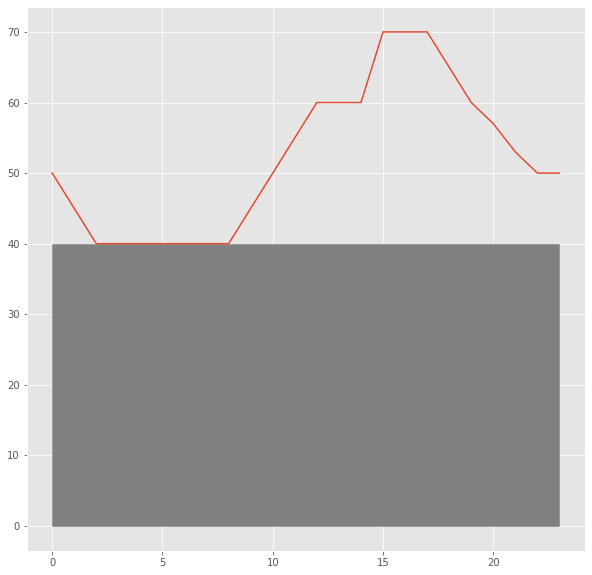

In [27]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.plot(demande)
plt.fill_between(hours,[c0]*len(hours),color="gray")

calculer ce qu'il faut combler, prendre à chaque heure, division euclidienne de la valeur


In [30]:
capacity = [30,20,10,5]

In [35]:
40%capacity[0]

10

In [45]:
60//30

2

In [51]:
d1 = 70
r = d1
c = 0
while r!=0 and c<len(capacity):
    print(r)
    r = r-capacity[c]
    print(c, capacity[c])
    print(r)
    c+=1


70
0 30
40
40
1 20
20
20
2 10
10
10
3 5
5


In [42]:
c

1

In [72]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [62]:
mat[len(capacity)+1][4]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [98]:
mat = np.zeros((len(capacity)+1,24))
for (i,d) in enumerate(demande) : 
    # For each hourly demande we need to compute which solution we are going to use
    r = d 
    j = 0
    while r!=0 and j<len(capacity) :
            if capacity[j] < r:
                # This capacity is not sufficient to match demande
                r = r-capacity[j]
                mat[j][i] = 1
            else :
                # Capacity above what we need, will only use a part of it 
                r = 0
                mat[j][i] = 1
                
            j+=1
    if r!=0:
        mat[len(capacity)][i] = 1

affichage des résultats

In [67]:
demande[0]

50

In [90]:
mat.shape

(5, 24)

In [89]:
np.zeros((2,1)).shape

(2, 1)

In [87]:
np.zeros((5,6))[:][0]

array([0., 0., 0., 0., 0., 0.])

In [99]:
for j in range(24):
    for i in range(5):
        print(mat[i][j])
    print('\n')

1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
1.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0


1.0
1.0
0.0
0.0
0.0




Affichage de la fonction de demande et des capacités

In [100]:
colors = ['gray','orange','blue','green','yellow']

In [93]:
demande

[50,
 45,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 45,
 50,
 55,
 60,
 60,
 60,
 70,
 70,
 70,
 65,
 60,
 57,
 53,
 50,
 50]

In [92]:
mat[1][0]

1.0

In [ ]:
def optim_prod(demande,capacite):
    # Capacite is a list of array, sorted from highest production capacity to top 
    
    for d in demande : 
        # For each hourly demande we need to compute which solution we are going to use